$$
\begin{cases}
-10.3x_1 + 10.2x_2 = 70 \\
4.7x_1 + 12.3x_2 = 173 \\
13.2x_1 + 8.8x_2 = 282
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
equations = ['$-10.3x_1 + 10.2x_2 = 70$', '$4.7x_1 + 12.3x_2 = 173$', '$13.2x_1 + 8.8x_2 = 282$']

x_1 = np.linspace(0, 20, 1000)

f = [(70 + 10.3 * x_1)/10.2, (173 - 4.7 * x_1)/12.3, (282 - 13.2 * x_1)/8.8]

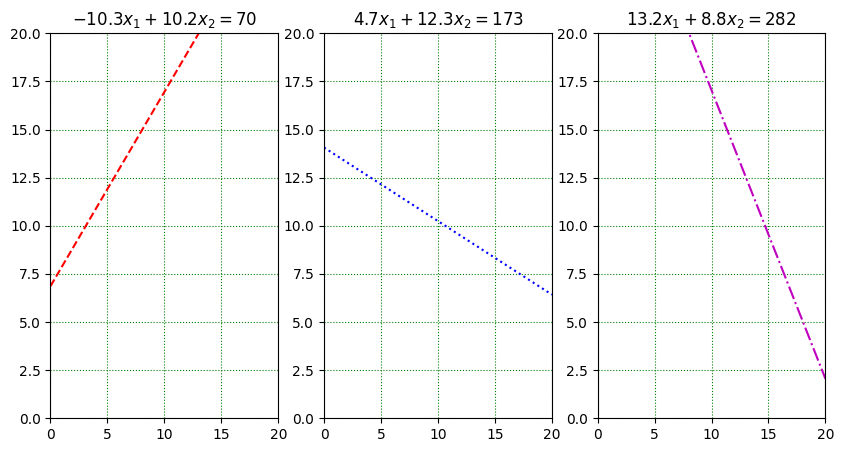

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.set(xlim=(0, 20), ylim=(0, 20), title=equations[i])
    ax.grid(linestyle=':', color='green')

axes[0].plot(x_1, f[0], '--r')
axes[1].plot(x_1, f[1], ':b')
axes[2].plot(x_1, f[2], '-.m')

plt.savefig('equations.png')
plt.savefig('equations.jpg')
plt.savefig('equations.svg')

plt.show()

In [7]:
matrices = [
    # 1 & 2
    np.array([[-10.3, 10.2],
              [  4.7, 12.3]]),
    # 2 & 3
    np.array([[ 4.7, 12.3],
              [13.2,  8.8]]),
    # 1 & 3
    np.array([[-10.3, 10.2],
              [ 13.2,  8.8]])
]
rhs = [
    np.array([ 70, 173]), # 1 & 2
    np.array([173, 282]), # 2 & 3
    np.array([ 70, 282])  # 1 & 3
]

solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]

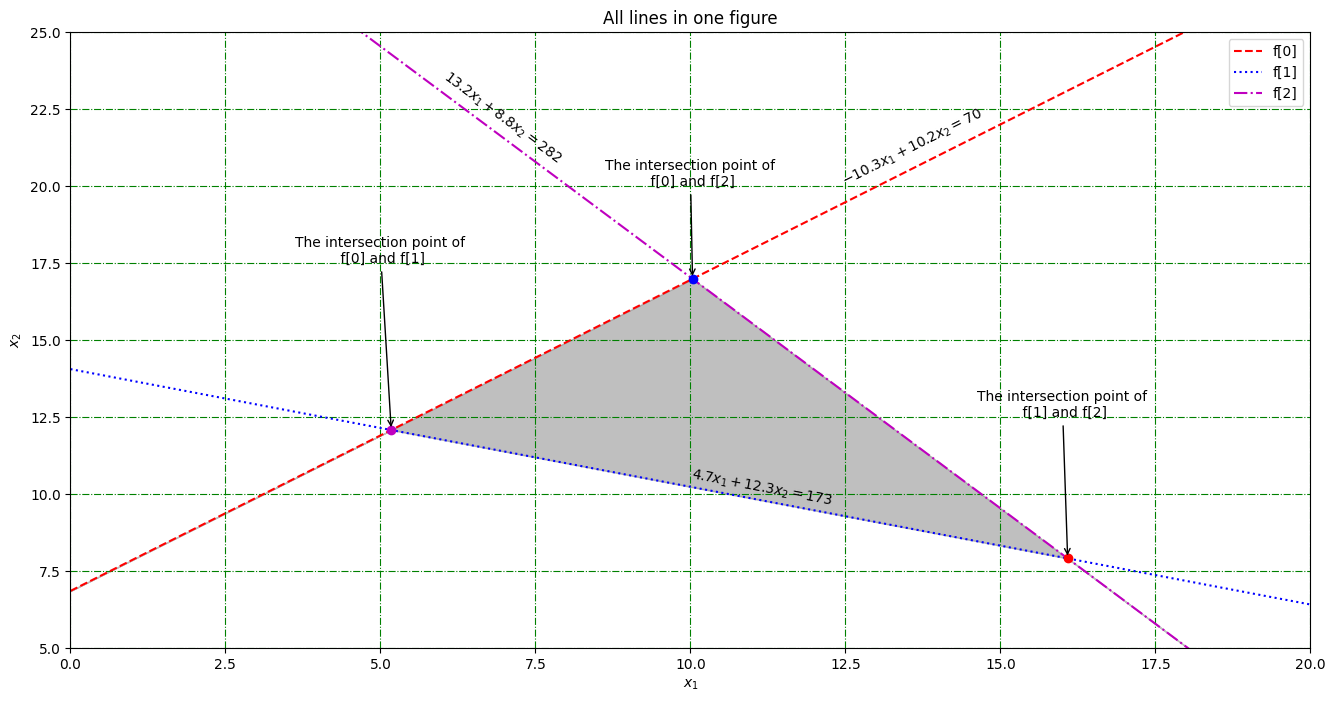

In [9]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(0, 20), ylim=(5, 25), xlabel='$x_1$', ylabel='$x_2$', title='All lines in one figure')
ax.grid(linestyle='-.', color='green')

ax.plot(x_1, f[0], '--r', label='f[0]')
ax.plot(x_1, f[1], ':b', label='f[1]')
ax.plot(x_1, f[2], '-.m', label='f[2]')

locations = [
    (12.5,   20),
    (  10, 10.5),
    (   6, 23.5)
]
ax.text(*locations[0], equations[0], rotation=np.rad2deg(np.arctan(10.3/10.2)), rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[1], equations[1], rotation=np.rad2deg(np.arctan(-4.7/12.3)), rotation_mode = 'anchor', transform_rotates_text = True)
ax.text(*locations[2], equations[2], rotation=np.rad2deg(np.arctan(-13.2/8.8)), rotation_mode = 'anchor', transform_rotates_text = True)

ax.plot(*solutions[0], marker='o', color='m')
ax.plot(*solutions[1], marker='o', color='r')
ax.plot(*solutions[2], marker='o', color='b')

y = np.minimum(f[0], f[2])
y_1 = np.minimum(f[1], y)
plt.fill_between(x_1, y, y_1, color='grey', alpha=0.5)

ax.annotate(f"The intersection point of\n f[0] and f[1]", ha="center", xy=solutions[0], xytext=( 5, 17.5), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[1] and f[2]", ha="center", xy=solutions[1], xytext=(16, 12.5), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[0] and f[2]", ha="center", xy=solutions[2], xytext=(10, 20), arrowprops=dict(arrowstyle="->"))

ax.legend()

plt.savefig('intersection.png')
plt.savefig('intersection.jpg')
plt.savefig('intersection.svg')

plt.show()